<a href="https://colab.research.google.com/github/Sahil-Jagadale/ML_PRACTICALS/blob/main/Problem_Statement_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [8]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
data.shape

(400, 5)

In [10]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
x = data.drop(columns=['Purchased'], axis=1)
y = data['Purchased']
x = pd.get_dummies(x)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
model = GaussianNB()

In [27]:
model.fit(x_train,y_train)

GaussianNB()

In [29]:
y_pred = model.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:-")
print(cr)

Accuracy: 0.9
Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.88      0.82      0.85        28

    accuracy                           0.90        80
   macro avg       0.90      0.88      0.89        80
weighted avg       0.90      0.90      0.90        80



In [31]:
from sklearn.metrics import roc_curve, auc

In [35]:
y_prob = model.predict_proba(x_test)[:,-1]

In [36]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)

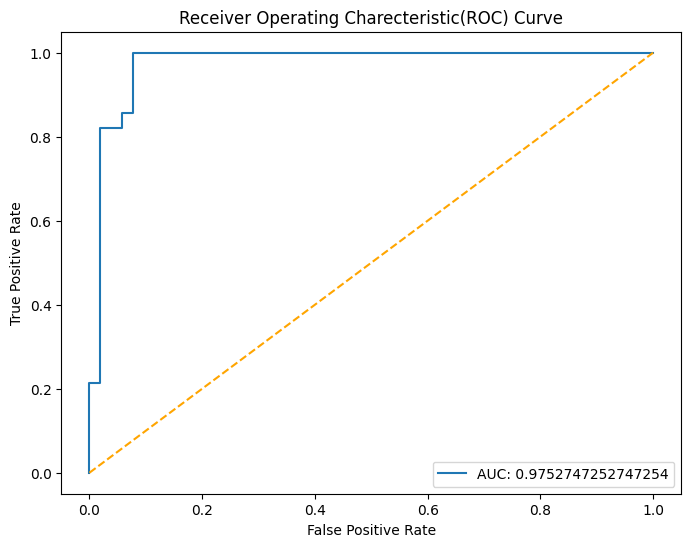

In [39]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"AUC: {roc_auc}")
plt.plot([0,1],[0,1],color="orange", linestyle="--")
plt.title("Receiver Operating Charecteristic(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()